In [1]:
import ROOT
import matplotlib.pyplot as plt
import numpy as np

import composition.analysis.plotting as plotting 

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


proton integrated muons = 8301.67
proton observed muons = 3.320668

iron integrated muons = 7600.44444444
iron observed muons = 3.04017777778



/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


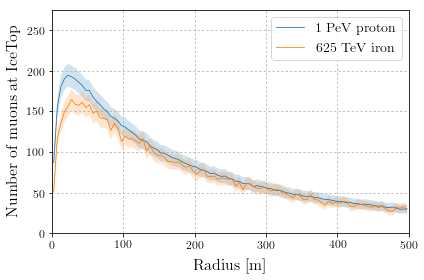

In [2]:
fig, ax = plt.subplots()
n_muons_comp = {}
for composition, label in zip(['proton', 'iron'], ['1 PeV proton', '625 TeV iron']):
    if composition == 'proton':
        f = ROOT.TFile('{}_1PeV_mu_0.2GeV.root'.format(composition))
    else:
        f = ROOT.TFile('0.8GeV/mu_iron_625TeV.root')
    
    n_muons_profile = f.Get('hnmup')
#     n_bins = n_muons_profile.GetNbinsX()
#     xaxis = n_muons_profile.GetXaxis()

    n_muons = [n_muons_profile.GetBinContent(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    n_muons_comp[composition] = np.array(n_muons)
    n_muons_err = [n_muons_profile.GetBinError(i) for i in range(1, n_muons_profile.GetNbinsX()+1)]
    bin_centers = [n_muons_profile.GetBinCenter(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    
    tot_muons = 0
    for num_muons, x in zip(n_muons, bin_centers):
        if bin_centers >= 178: tot_muons += num_muons
    print('{} integrated muons = {}'.format(composition, tot_muons))
    print('{} observed muons = {}\n'.format(composition, tot_muons*4e-4))
    
    counts = np.array(n_muons)
    ax.plot(bin_centers, n_muons, ls='-', marker='None', label=label)
#     ax.errorbar(bin_centers, n_muons, yerr=np.sqrt(n_muons), ls='None', marker='.', label=label)
    ax.fill_between(bin_centers, counts-np.sqrt(counts), counts+np.sqrt(counts), alpha=0.2)
#     ax.errorbar(bin_centers, n_muons, yerr=n_muons_err, ls='None', marker='.', label=label)
    
    
ax.set_xlabel('Radius [m]')
ax.set_ylabel('Number of muons at IceTop')
ax.set_xlim([0, 500])
ax.set_ylim([0, 275])
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/muon_distance_1PeV_proton_625TeV_iron.png')
plt.show()

In [3]:
distance_mask = np.array(bin_centers) >= 175

In [4]:
diff = n_muons_comp['iron'] - n_muons_comp['proton']
percent_diff = diff/n_muons_comp['proton']
np.mean(percent_diff[distance_mask])

-0.04277062118461817

proton integrated muons = 8301.67
proton observed muons = 3.320668

iron integrated muons = 12314.33
iron observed muons = 4.925732



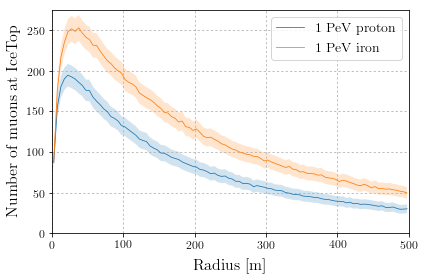

In [5]:
fig, ax = plt.subplots()
n_muons_comp = {}
for composition, label in zip(['proton', 'iron'], ['1 PeV proton', '1 PeV iron']):
    f = ROOT.TFile('{}_1PeV_mu_0.2GeV.root'.format(composition))
    
    n_muons_profile = f.Get('hnmup')
    n_bins = n_muons_profile.GetNbinsX()
    xaxis = n_muons_profile.GetXaxis()

    n_muons = [n_muons_profile.GetBinContent(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    n_muons_comp[composition] = np.array(n_muons)
    n_muons_err = [n_muons_profile.GetBinError(i) for i in range(1, n_muons_profile.GetNbinsX()+1)]
    bin_centers = [n_muons_profile.GetBinCenter(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    
    tot_muons = 0
    for num_muons, x in zip(n_muons, bin_centers):
        if bin_centers >= 178: tot_muons += num_muons
    print('{} integrated muons = {}'.format(composition, tot_muons))
    print('{} observed muons = {}\n'.format(composition, tot_muons*4e-4))
    
    counts = np.array(n_muons)
    ax.plot(bin_centers, n_muons, ls='-', marker='None', label=label)
#     ax.errorbar(bin_centers, n_muons, yerr=np.sqrt(n_muons), ls='None', marker='.', label=label)
    ax.fill_between(bin_centers, counts-np.sqrt(counts), counts+np.sqrt(counts), alpha=0.2)
#     ax.errorbar(bin_centers, n_muons, yerr=n_muons_err, ls='None', marker='.', label=label)
    
    
ax.set_xlabel('Radius [m]')
ax.set_ylabel('Number of muons at IceTop')
ax.set_xlim([0, 500])
ax.set_ylim([0, 275])
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/lateral-dist-1.png')
plt.show()

In [14]:
print('Observed number of muons (proton): {} --> {}'.format(n_muons_comp['proton'].sum(), 4e-4*n_muons_comp['proton'].sum()))
print('Observed number of muons (iron): {} --> {}'.format(n_muons_comp['iron'].sum(), 4e-4*n_muons_comp['iron'].sum()))

Observed number of muons (proton): 8301.67 --> 3.320668
Observed number of muons (iron): 12314.33 --> 4.925732


In [15]:
diff = n_muons_comp['iron'] - n_muons_comp['proton']
percent_diff = diff/n_muons_comp['proton']
np.mean(percent_diff[distance_mask])

0.62337925590374454

In [16]:
print('Observed number of muons (proton): {} --> {}'.format(n_muons_comp['proton'][distance_mask].sum(), 4e-4*n_muons_comp['proton'][distance_mask].sum()))
print('Observed number of muons (iron): {} --> {}'.format(n_muons_comp['iron'][distance_mask].sum(), 4e-4*n_muons_comp['iron'][distance_mask].sum()))

Observed number of muons (proton): 3404.61 --> 1.361844
Observed number of muons (iron): 5476.0 --> 2.1904


proton integrated muons = 8301.67
proton observed muons = 3.320668

iron integrated muons = 12314.33
iron observed muons = 4.925732



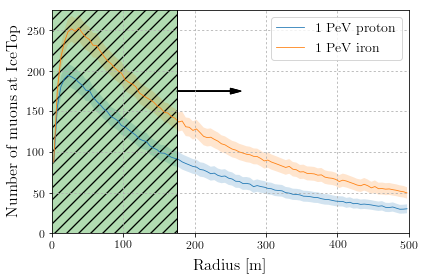

In [33]:
fig, ax = plt.subplots()
for composition, label in zip(['proton', 'iron'], ['1 PeV proton', '1 PeV iron']):
    f = ROOT.TFile('{}_1PeV_mu_0.2GeV.root'.format(composition))
    
    n_muons_profile = f.Get('hnmup')
    n_bins = n_muons_profile.GetNbinsX()
    xaxis = n_muons_profile.GetXaxis()

    n_muons = [n_muons_profile.GetBinContent(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    n_muons_err = [n_muons_profile.GetBinError(i) for i in range(1, n_muons_profile.GetNbinsX()+1)]
    bin_centers = [n_muons_profile.GetBinCenter(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    
    tot_muons = 0
    for num_muons, x in zip(n_muons, bin_centers):
        if bin_centers >= 178: tot_muons += num_muons
    print('{} integrated muons = {}'.format(composition, tot_muons))
    print('{} observed muons = {}\n'.format(composition, tot_muons*4e-4))
    
    counts = np.array(n_muons)
    ax.plot(bin_centers, n_muons, ls='-', marker='None', label=label)
#     ax.errorbar(bin_centers, n_muons, yerr=np.sqrt(n_muons), ls='None', marker='.', label=label)
    ax.fill_between(bin_centers, counts-np.sqrt(counts), counts+np.sqrt(counts), alpha=0.2)
#     ax.errorbar(bin_centers, n_muons, yerr=n_muons_err, ls='None', marker='.', label=label)
    
    # Add EM IceTop region
    ax.fill_between([0, 175], y1=300, color='C2', alpha=0.2, hatch='//')
    ax.axvline(175, marker='None', ls='-', color='k', lw=1)
    ax.arrow(175, 175, 75, 0, head_width=7, head_length=15, fc='k', ec='k', lw=1)
    
ax.set_xlabel('Radius [m]')
ax.set_ylabel('Number of muons at IceTop')
ax.set_xlim([0, 500])
ax.set_ylim([0, 275])
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/lateral-dist-1-filled.png')
plt.show()

proton integrated muons = 8301.67
proton observed muons = 3.320668

iron integrated muons = 12314.33
iron observed muons = 4.925732



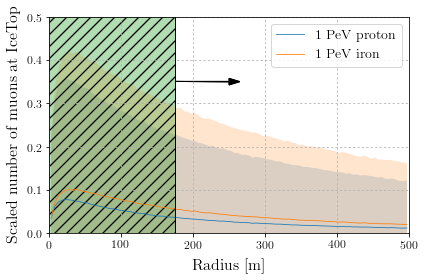

In [46]:
fig, ax = plt.subplots()
for composition, label in zip(['proton', 'iron'], ['1 PeV proton', '1 PeV iron']):
    f = ROOT.TFile('{}_1PeV_mu_0.2GeV.root'.format(composition))
    
    n_muons_profile = f.Get('hnmup')
    n_bins = n_muons_profile.GetNbinsX()
    xaxis = n_muons_profile.GetXaxis()

    n_muons = [n_muons_profile.GetBinContent(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    n_muons_err = [n_muons_profile.GetBinError(i) for i in range(1, n_muons_profile.GetNbinsX()+1)]
    bin_centers = [n_muons_profile.GetBinCenter(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    
    tot_muons = 0
    for num_muons, x in zip(n_muons, bin_centers):
        if bin_centers >= 178: tot_muons += num_muons
    print('{} integrated muons = {}'.format(composition, tot_muons))
    print('{} observed muons = {}\n'.format(composition, tot_muons*4e-4))
    
#     counts = np.array(n_muons)
#     ax.plot(bin_centers, n_muons, ls='-', marker='None', label=label)
# #     ax.errorbar(bin_centers, n_muons, yerr=np.sqrt(n_muons), ls='None', marker='.', label=label)
#     y_lower = counts-np.sqrt(counts)
#     y_lower[y_lower < 0] = 0
#     y_upper = counts+np.sqrt(counts)
#     ax.fill_between(bin_centers, y_lower, y_upper, alpha=0.2)
    
    counts = np.array(n_muons)
    coverage_factor = 4e-4
    scaled_counts = coverage_factor * counts
    y_lower = scaled_counts-np.sqrt(scaled_counts)
    y_lower[y_lower < 0] = 0
    y_upper = scaled_counts+np.sqrt(scaled_counts)
#     ax.errorbar(bin_centers, scaled_counts, yerr=np.sqrt(counts), ls='None', marker='.', label=label)
    ax.plot(bin_centers, scaled_counts, ls='-', marker='None', label=label)
    ax.fill_between(bin_centers, y_lower, y_upper, alpha=0.2)
    
    # Add EM IceTop region
    ax.fill_between([0, 175], y1=0.5, color='C2', alpha=0.2, hatch='//')
    ax.axvline(175, marker='None', ls='-', color='k', lw=1)
    ax.arrow(175, 0.35, 75, 0.0, head_width=0.015, head_length=15, fc='k', ec='k', lw=1)
    
ax.set_xlabel('Radius [m]')
ax.set_ylabel('Scaled number of muons at IceTop')
ax.set_xlim([0, 500])
ax.set_ylim([0, 0.5])
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/lateral-dist-1-scaled.png')
plt.show()

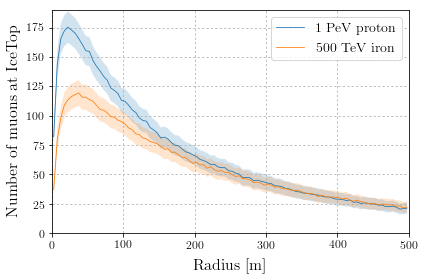

In [49]:
fig, ax = plt.subplots()
for composition, label, energy in zip(['proton', 'iron'], ['1 PeV proton', '500 TeV iron'], ['1PeV', '500TeV']):
    f = ROOT.TFile('0.8GeV/mu_{}_{}.root'.format(composition, energy))
    
    n_muons_profile = f.Get('hnmup')
    n_bins = n_muons_profile.GetNbinsX()
    xaxis = n_muons_profile.GetXaxis()

    n_muons = [n_muons_profile.GetBinContent(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    n_muons_err = [n_muons_profile.GetBinError(i) for i in range(1, n_muons_profile.GetNbinsX()+1)]
    bin_centers = [n_muons_profile.GetBinCenter(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    
    counts = np.array(n_muons)
    ax.plot(bin_centers, counts, ls='-', marker='None', label=label)
    ax.fill_between(bin_centers, counts-np.sqrt(counts), counts+np.sqrt(counts), alpha=0.2)
        
ax.set_xlabel('Radius [m]')
ax.set_ylabel('Number of muons at IceTop')
ax.set_xlim([0, 500])
ax.set_ylim([0, 190])
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/lateral-dist-2.png')
plt.show()

In [4]:
f = ROOT.TFile('proton_1PeV_mu_0.2GeV.root')

In [5]:
profile = f.Get('hemp')

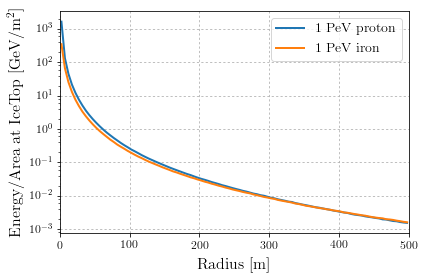

In [11]:
fig, ax = plt.subplots()
for composition, label in zip(['proton', 'iron'], ['1 PeV proton', '1 PeV iron']):
    f = ROOT.TFile('{}_1PeV_mu_0.2GeV.root'.format(composition))

    n_muons_profile = f.Get('hemp')
    n_bins = n_muons_profile.GetNbinsX()
    xaxis = n_muons_profile.GetXaxis()

    n_muons = [n_muons_profile.GetBinContent(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]
    n_muons_err = [n_muons_profile.GetBinError(i) for i in range(1, n_muons_profile.GetNbinsX()+1)]
    bin_centers = [n_muons_profile.GetBinCenter(i)for i in range(1, n_muons_profile.GetNbinsX()+1)]

    y = np.array(n_muons)
    y_err = np.array(n_muons_err)
    ax.plot(bin_centers, y, ls='-', marker='None', lw=2, label=label)
    ax.fill_between(bin_centers, y-y_err, y+y_err)
    

ax.set_xlabel('Radius [m]')
ax.set_ylabel('Energy/Area at IceTop [GeV/m$^2$]')
ax.set_xlim([0, 500])
# ax.set_ylim([0, 190])
ax.set_yscale('log', nonposy='clip')
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/lateral-dist-2.png')
plt.show()